# Import Required Libraries

First, need to import the necessary Python libraries for data manipulation and regression analysis.



In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Load and Prepare the Data
Load the historical data into a Pandas DataFrame and prepare the data for regression analysis.



In [2]:
# Load the data into a Pandas DataFrame
data = {
    "Open": [15194.53036, 15074.04387, 14871.5726, 14622.2275, 14769.55331, 14613.2262, 14744.04991, 14717.89607, 14853.3465, 14530.95948, 14600.13873, 14668.4544, 14662.69111, 14756.62391, 14813.48473, 15225.34413, 15152.53158, 15161.16845, 15425.9479, 15433.01278, 15293.26759, 15390.58814],
    "Close": [15241.11589, 15131.51996, 15047.15451, 14973.24136, 14723.22245, 14776.25252, 14565.61634, 14837.56942, 14715.24405, 14702.76564, 14580.15929, 14545.82597, 14768.89505, 14701.09663, 14694.24335, 14969.92259, 15191.23444, 15225.3718, 15202.39823, 15473.89311, 15348.52514, 15289.73638],
    "High": [15248.21669, 15241.94269, 15070.64186, 15021.38332, 14784.68604, 14803.04273, 14819.86593, 14892.17577, 14901.85262, 14787.5836, 14657.21138, 14678.48179, 14771.11775, 14855.91953, 14849.24844, 15245.19245, 15219.9225, 15268.96213, 15435.4498, 15512.81713, 15414.60914, 15447.84872],
    "Low": [15119.61514, 15050.53872, 14816.32028, 14575.94767, 14584.38599, 14592.55504, 14504.14377, 14701.52373, 14664.77699, 14510.17002, 14432.59695, 14505.67559, 14615.44864, 14686.84367, 14691.68939, 14967.60285, 15069.41465, 15155.46063, 15173.70917, 15337.18211, 15256.59945, 15278.88022],
    "Date": ['10/11/23', '10/10/23', '10/09/23', '10/06/23', '10/05/23', '10/04/23', '10/03/23', '10/02/23', '09/29/23', '09/28/23', '09/27/23', '09/26/23', '09/25/23', '09/22/23', '09/21/23', '09/20/23', '09/19/23', '09/18/23', '09/15/23', '09/14/23', '09/13/23', '09/12/23']
}

df = pd.DataFrame(data)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the number of days since the start of the dataset
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Prepare the input features (X) and target variable (y)
X = df[['Days']]
y = df['Close']


# Visualization of Stock Close Prices Over Time

 visualization of how the stock's closing prices change over the specified period.









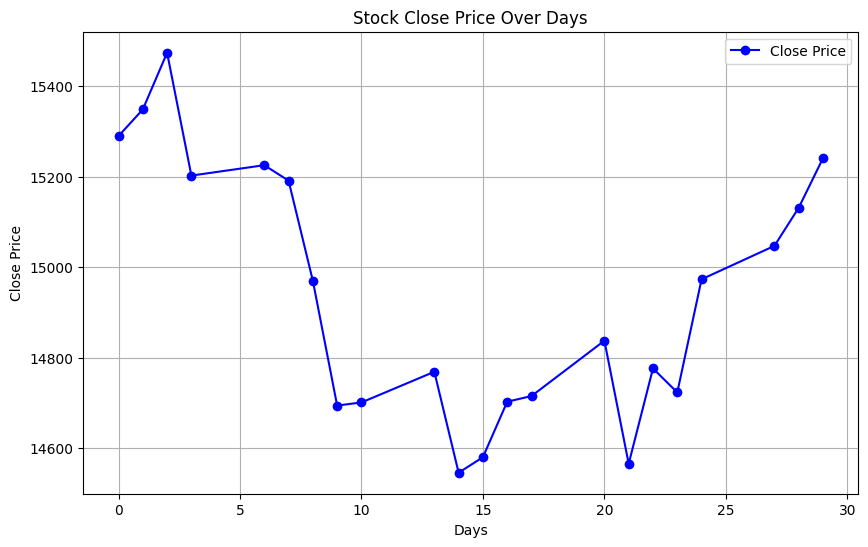

In [3]:
import matplotlib.pyplot as plt

# Plotting the Close prices over Days
plt.figure(figsize=(10, 6))
plt.plot(df['Days'], df['Close'], marker='o', color='b', label='Close Price')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Days')
plt.legend()
plt.grid(True)
plt.show()


#Trends in Stock Prices: Open, Close, High, and Low Values Over Time

 A line plot that illustrates the trends in 'Open', 'Close', 'High', and 'Low' prices of a stock over a period of time (represented by 'Days').








<Axes: title={'center': 'Stock Prices vs Days'}, xlabel='Days'>

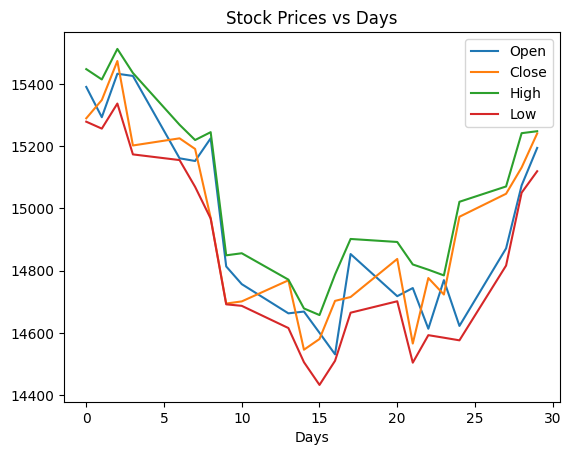

In [4]:
df.plot(kind='line', x='Days', y=['Open', 'Close', 'High', 'Low'], title='Stock Prices vs Days')


# Comparison of Close Prices and High Prices: Analyzing Relationships in Stock Data

This scatter plot helps visualize the relationship between 'Close' prices and 'High' prices.







array([<Axes: xlabel='Close', ylabel='High'>], dtype=object)

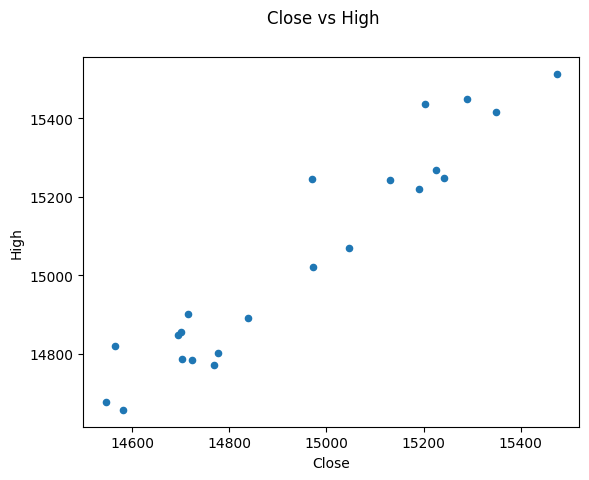

In [5]:
df.plot(kind='scatter', x='Close', y='High', title='Close vs High', subplots=True)


# Create a linear regression model


In [6]:
model = LinearRegression()



# Train the model


In [7]:

model.fit(X, y)


LinearRegression()

# Calculate the number of days for the next 7 days


In [8]:

future_days = pd.DataFrame({'Days': range(df['Days'].max() + 1, df['Days'].max() + 8)})



In [9]:
future_days

,Days
0,30
1,31
2,32
3,33
4,34
5,35
6,36


# Predict Close Price for the next 7 days


In [10]:

future_close_prices = model.predict(future_days)


In [11]:
future_close_prices


array([14758.12646167, 14746.45625308, 14734.78604449, 14723.11583591,
       14711.44562732, 14699.77541873, 14688.10521014])

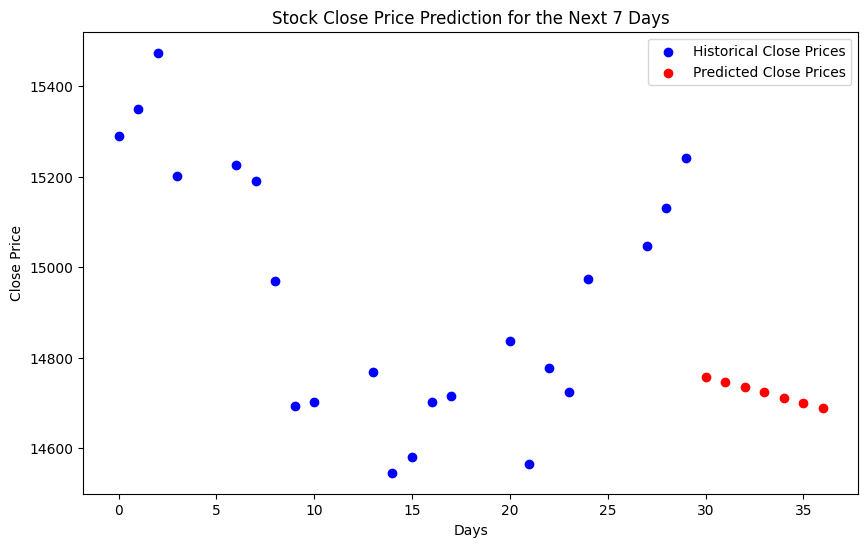

In [12]:
import matplotlib.pyplot as plt

# Plotting existing Close Prices
plt.figure(figsize=(10, 6))
plt.scatter(df['Days'], df['Close'], color='blue', label='Historical Close Prices')

# Plotting predicted Close Prices for the next 7 days
plt.scatter(future_days, future_close_prices, color='red', label='Predicted Close Prices')

plt.xlabel('Days')
plt.ylabel('Close Price')
plt.title('Stock Close Price Prediction for the Next 7 Days')
plt.legend()
plt.show()
